###### The objective of this program is the following:
 
- Chart adjusted closing price
- Calculate daily and monthly returns
- Charting daily and monthly returns
- Histogram to get a sense of how extreme the returns can be 
- Calculate cumulative returns 


###### Activating code auto-complete

In [6]:
%config IPCompleter.greedy=True

###### Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal
from matplotlib import style

###### Setting matplotlib visualization style

In [10]:
style.use('dark_background')

###### Extracting Data for one symbol from Yahoo Stocks Data API

In [12]:
market_data_1_symbol = web.get_data_yahoo("NFLX", start = "2018-04-23", end = "2020-04-23")
market_data_1_symbol

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-23,331.220001,317.079987,329.149994,318.690002,8968000,318.690002
2018-04-24,320.250000,302.309998,319.220001,307.019989,13893200,307.019989
2018-04-25,309.980011,292.619995,306.369995,305.760010,14919700,305.760010
2018-04-26,316.630005,305.579987,310.000000,313.980011,9266700,313.980011
2018-04-27,317.450012,306.500000,316.250000,311.760010,7074400,311.760010
...,...,...,...,...,...,...
2020-04-17,432.000000,414.700012,431.000000,422.959991,12616300,422.959991
2020-04-20,444.489990,430.559998,435.170013,437.489990,12655800,437.489990
2020-04-21,447.000000,425.600006,444.769989,433.829987,23177600,433.829987


###### Charting adjusted closing price

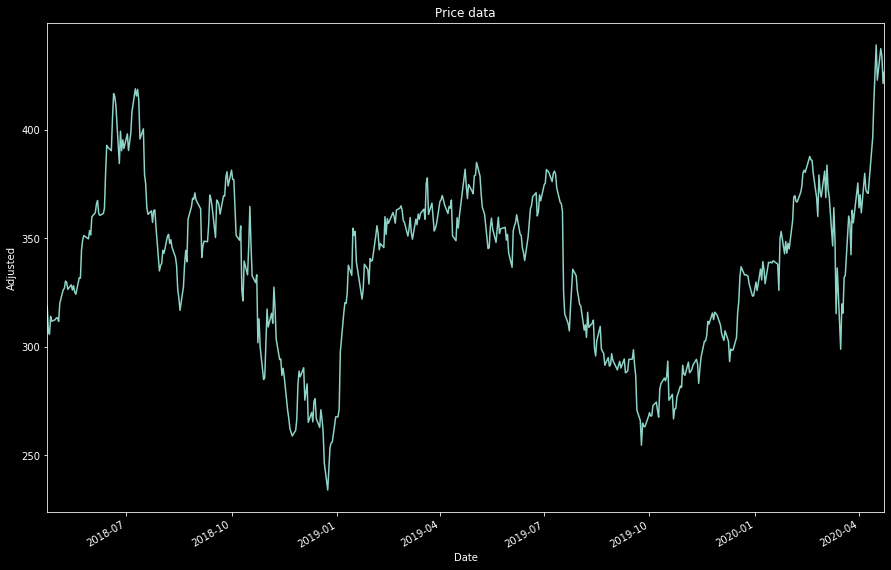

In [13]:
plt.figure(figsize=(15,10))
market_data_1_symbol['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

###### Calculating daily and monthly returns for individual stock

In [14]:
daily_returns = market_data_1_symbol['Adj Close'].pct_change()
daily_returns

Date
2018-04-23         NaN
2018-04-24   -0.036619
2018-04-25   -0.004104
2018-04-26    0.026884
2018-04-27   -0.007071
                ...   
2020-04-17   -0.036911
2020-04-20    0.034353
2020-04-21   -0.008366
2020-04-22   -0.028606
2020-04-23    0.012529
Name: Adj Close, Length: 505, dtype: float64

- Pandas dataframe. ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward.
- Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [15]:
monthly_returns = market_data_1_symbol['Adj Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2018-04-30         NaN
2018-05-31    0.125264
2018-06-30    0.113282
2018-07-31   -0.137905
2018-08-31    0.089584
2018-09-30    0.017542
2018-10-31   -0.193382
2018-11-30   -0.051859
2018-12-31   -0.064551
2019-01-31    0.268400
2019-02-28    0.054786
2019-03-31   -0.004300
2019-04-30    0.039208
2019-05-31   -0.073568
2019-06-30    0.070030
2019-07-31   -0.120685
2019-08-31   -0.090529
2019-09-30   -0.088953
2019-10-31    0.073948
2019-11-30    0.094812
2019-12-31    0.028316
2020-01-31    0.066508
2020-02-29    0.069373
2020-03-31    0.017532
2020-04-30    0.136352
Freq: M, Name: Adj Close, dtype: float64

###### Charting Daily and Monthly Returns for Netflix

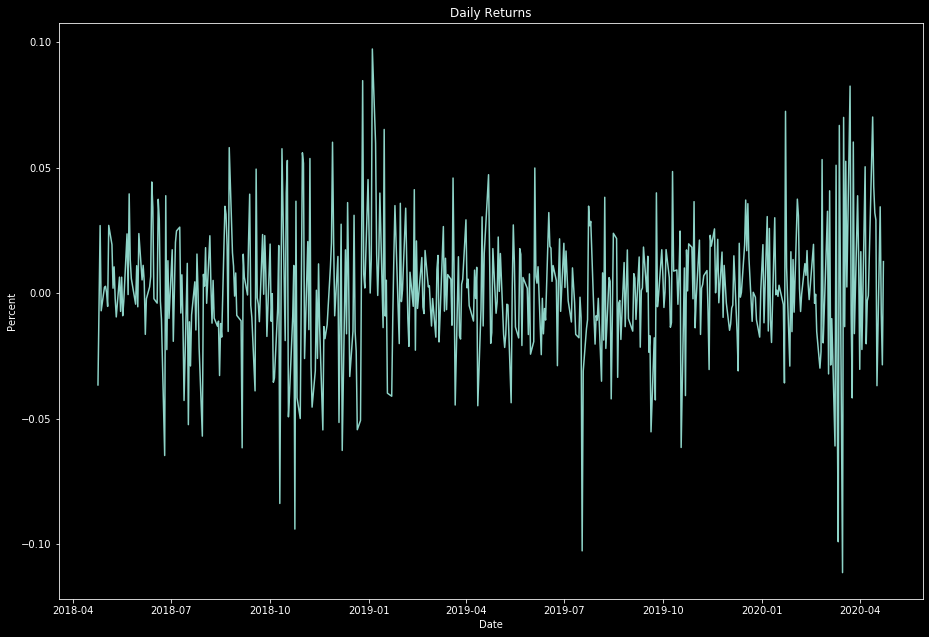

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

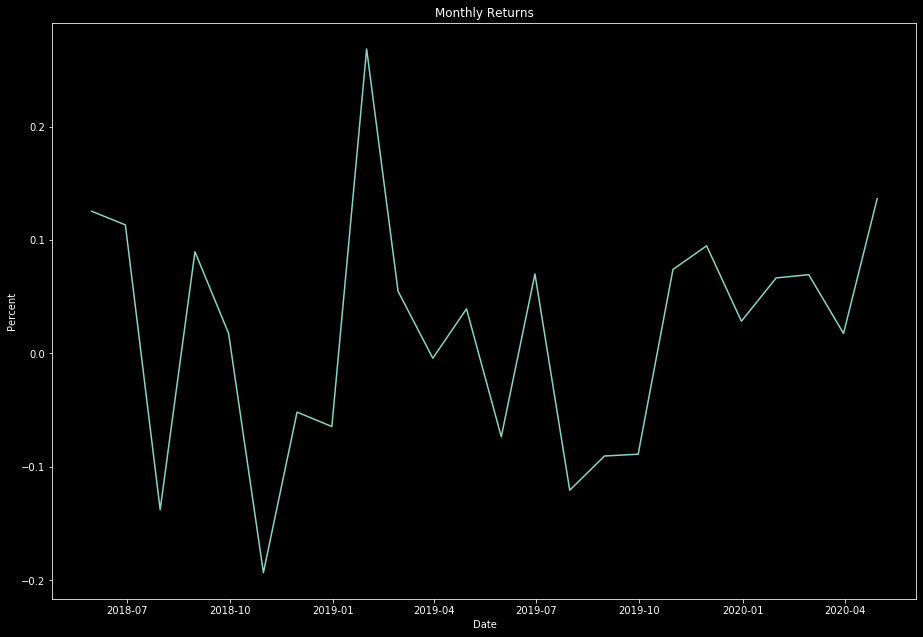

In [17]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Monthly Returns")
plt.show()

##### After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 10% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

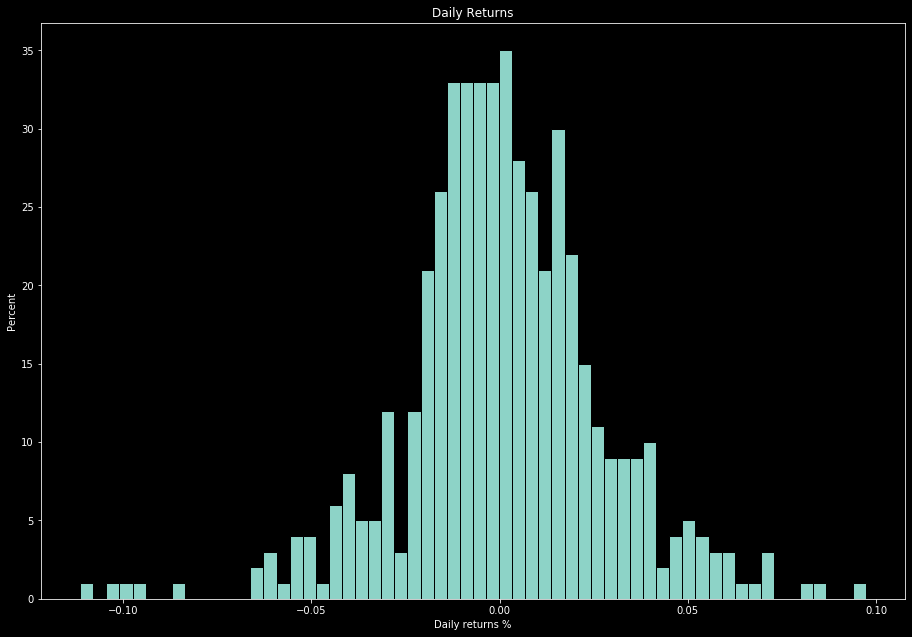

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
daily_returns.plot.hist(bins = 60, edgecolor='black')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

##### Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. 
- To calculate the growth of our investment or in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.
- If we were to invest USD 1 on Netflix in April 2018, the value today would have been close to USD 1.3, as we can see below. 

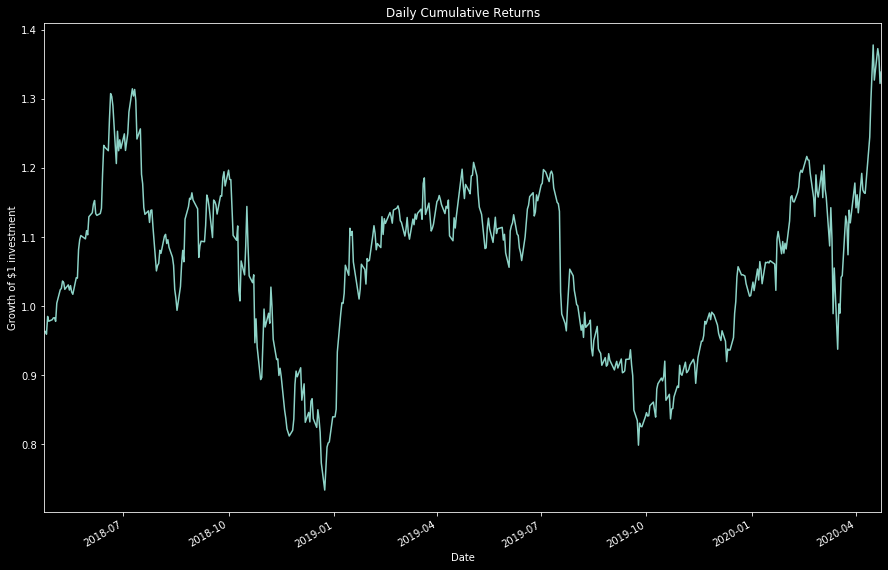

In [22]:
cumulative_returns = (daily_returns+1).cumprod()
fig= plt.figure(figsize=(15,10))
ax1 = cumulative_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily Cumulative Returns")
ax1